In [140]:
# Importing our dependencies
from sklearn.model_selection import train_test_split
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


from sklearn.datasets import make_regression


#  Import the Baseball csv
import pandas as pd
baseball_df = pd.read_csv("Resources/Batting_Salary.csv")
baseball_df.head()

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary
0,aardsda01,2009,1,SEA,AL,73,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000
1,abreubo01,2009,1,LAA,AL,152,563.0,96.0,165.0,29.0,...,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000
2,adamsmi03,2009,1,SDN,NL,37,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800
3,adenhni01,2009,1,LAA,AL,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000
4,affelje01,2009,1,SFN,NL,74,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000


In [141]:
#check out the data in our table
baseball_df.head()

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary
0,aardsda01,2009,1,SEA,AL,73,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000
1,abreubo01,2009,1,LAA,AL,152,563.0,96.0,165.0,29.0,...,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000
2,adamsmi03,2009,1,SDN,NL,37,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800
3,adenhni01,2009,1,LAA,AL,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000
4,affelje01,2009,1,SFN,NL,74,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000


In [142]:
#exploring the values in the specific columns
baseball_df.nunique()

player_id    1645
year            6
stint           2
team_id        31
league_id       2
g             162
ab            649
r             121
h             211
double         56
triple         17
hr             50
rbi           131
sb             55
cs             21
bb            114
so            190
ibb            30
hbp            26
sh             21
sf             13
g_idp          32
salary       1224
dtype: int64

In [143]:
#reviewing the years included in the dataset

baseball_df.year.value_counts()

2011    812
2012    811
2013    809
2014    796
2010    790
2009    787
Name: year, dtype: int64

<AxesSubplot:xlabel='h', ylabel='salary'>

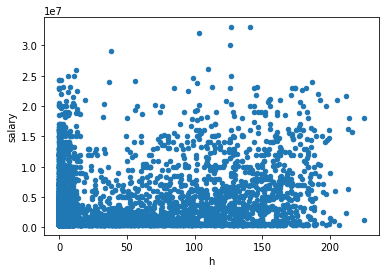

In [144]:
#plotting the hits vs. salary to gain an understanding of the data
baseball_df.plot.scatter('h','salary')

In [145]:
#drop columns with insignificant values
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
baseball_df = baseball_df.drop(columns=['player_id','team_id','league_id'])
baseball_df.head()


,year,stint,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary
0,2009,1,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000
1,2009,1,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000
2,2009,1,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800
3,2009,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000
4,2009,1,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000


In [146]:
#removing salary data from the training set
X = baseball_df.drop(columns="salary").values
y = baseball_df["salary"].values


In [147]:
baseball_df.head()

,year,stint,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary
0,2009,1,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000
1,2009,1,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000
2,2009,1,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800
3,2009,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000
4,2009,1,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000


In [148]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45)

In [149]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [152]:
#import the model of our choosing
model = LinearRegression()

In [153]:
# Fit the model to the training data. 
model.fit(X_train_scaled, y_train)

LinearRegression()

In [154]:
# Call the `score()` method on the model to show the R2 score
model.score(X_test_scaled, y_test)

0.1586764219424096

In [155]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.14463659409011287
Testing Data Score: 0.1586764219424096


In [156]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

mean squared error (MSE): 6.342797056090707e+17
R-squared (R2): -32076.39486979249
